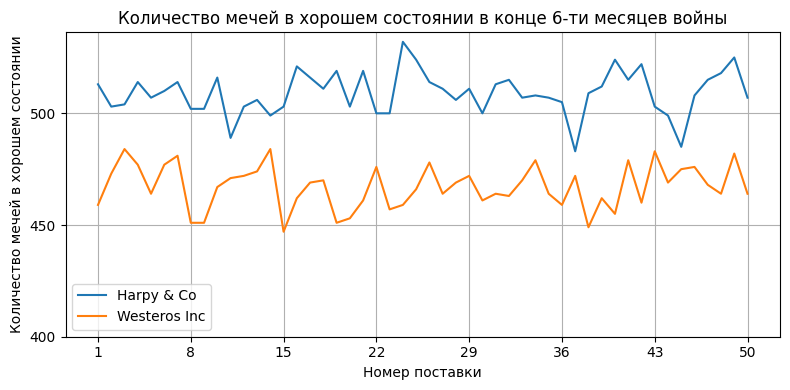

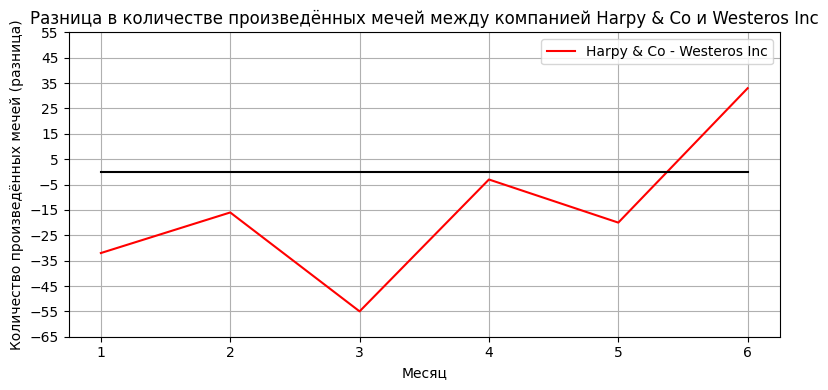

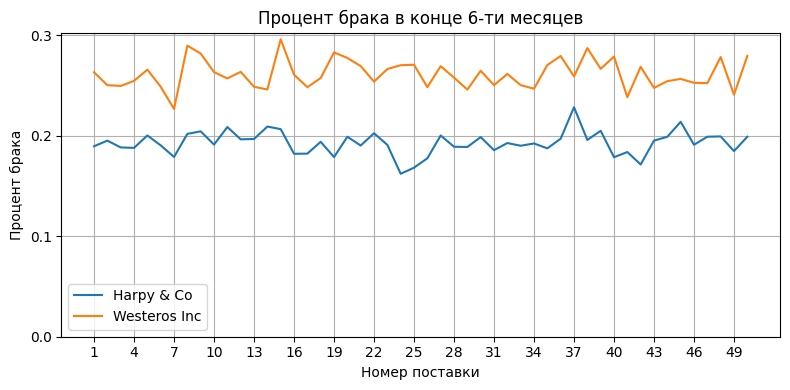

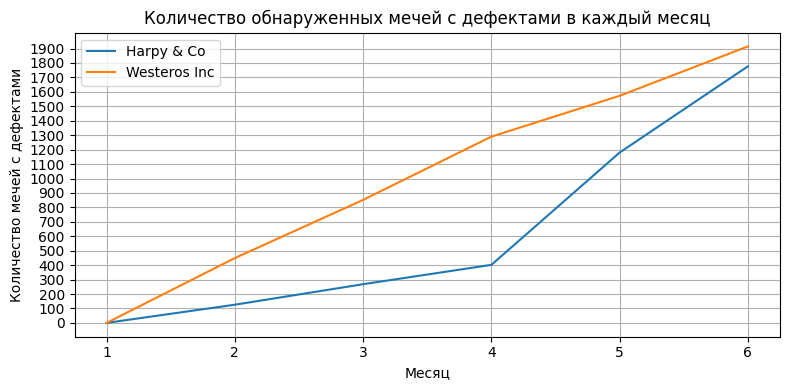

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

figsize=(8, 4)

# Загрузка данных из CSV-файла
data = pd.read_csv("production-data.csv")

# Разделение данных на две группы поставщиков
harpy_data = data[data['supplier'] == 'harpy.co']
westeros_data = data[data['supplier'] == 'westeros.inc']


y_values_harpy = []
y_values_westeros = []

# Расчет количества мечей в хорошем состоянии до конца недели
for i in range(1, 51):
  y_values_harpy.append(harpy_data[harpy_data['unsullen.id'] == i]['produced'].sum() - harpy_data[harpy_data['unsullen.id'] == i]['defects'].sum())
for i in range (51, 101):
  y_values_westeros.append(westeros_data[westeros_data['unsullen.id'] == i]['produced'].sum() - westeros_data[westeros_data['unsullen.id'] == i]['defects'].sum())

# Создание списка для оси x (номера поставок)
x_values = list(range(1, 51))

# Построение графика
plt.figure(figsize=figsize)
plt.plot(x_values, y_values_harpy, label='Harpy & Co')
plt.plot(x_values, y_values_westeros, label='Westeros Inc')
plt.xlabel('Номер поставки')
plt.ylabel('Количество мечей в хорошем состоянии')
plt.title('Количество мечей в хорошем состоянии в конце 6-ти месяцев войны')
plt.legend()
plt.xticks(np.arange(1, 51, 7))  # Шаг 7 для оси X
plt.yticks(np.arange(400, max(max(y_values_harpy), max(y_values_westeros)) + 10, 50))  # Шаг 50 для оси Y
plt.tight_layout()
plt.grid(True)
plt.savefig('7-before-last.png')
plt.show()



y_values_harpy = []
y_values_westeros = []
minus_values = []

for i in range(1, 7):
  y_values_harpy.append(harpy_data[harpy_data['production.date'] == i]['produced'].sum())
  y_values_westeros.append(westeros_data[westeros_data['production.date'] == i]['produced'].sum())
  minus_values.append(y_values_harpy[i - 1] - y_values_westeros[i - 1])

x_values = list(range(1, 7))
zeros = [0] * len(x_values)

# Построение графика
plt.figure(figsize=figsize)
plt.plot(x_values, minus_values, label='Harpy & Co - Westeros Inc', color = 'red')
plt.plot(x_values, zeros, color = 'black')
plt.xlabel('Месяц')
plt.ylabel('Количество произведённых мечей (разница)')
plt.title('Разница в количестве произведённых мечей между компанией Harpy & Co и Westeros Inc')
plt.legend()
plt.yticks(np.arange(-(max(max(minus_values), abs(min(minus_values))) + 10), max(max(minus_values), abs(min(minus_values))) + 10, 10))  # Шаг 10 для оси Y
plt.tight_layout()
plt.grid(True)
plt.savefig('6-before-last.png')
plt.show()


y_values_harpy = []
y_values_westeros = []

for i in range(1, 51):
  y_values_harpy.append(harpy_data[harpy_data['unsullen.id'] == i]['defects'].sum()/harpy_data[harpy_data['unsullen.id'] == i]['produced'].sum())
for i in range (51, 101):
  y_values_westeros.append(westeros_data[westeros_data['unsullen.id'] == i]['defects'].sum()/westeros_data[westeros_data['unsullen.id'] == i]['produced'].sum())

x_values = list(range(1, 51))

# Построение графика
plt.figure(figsize=figsize)
plt.plot(x_values, y_values_harpy, label='Harpy & Co')
plt.plot(x_values, y_values_westeros, label='Westeros Inc')
plt.xlabel('Номер поставки')
plt.ylabel('Процент брака')
plt.title('Процент брака в конце 6-ти месяцев')
plt.legend()
plt.xticks(np.arange(1, 51, 3))  # Шаг 3 для оси X
plt.yticks(np.arange(0, max(max(y_values_harpy), max(y_values_westeros)) + 0.1, 0.1))  # Шаг 0.1 для оси Y
plt.tight_layout()
plt.grid(True)
plt.savefig('5-before-last.png')
plt.show()



y_values_harpy = []
y_values_westeros = []

# Расчет количества мечей в хорошем состоянии до конца недели
for i in range(1, 7):
  y_values_harpy.append(harpy_data[harpy_data['report.date'] == i]['defects'].sum())
  y_values_westeros.append(westeros_data[westeros_data['report.date'] == i]['defects'].sum())

# Создание списка для оси x (номера поставок)
x_values = list(range(1, 7))

# Построение графика
plt.figure(figsize=figsize)
plt.plot(x_values, y_values_harpy, label='Harpy & Co')
plt.plot(x_values, y_values_westeros, label='Westeros Inc')
plt.xlabel('Месяц')
plt.ylabel('Количество мечей с дефектами')
plt.title('Количество обнаруженных мечей с дефектами в каждый месяц')
plt.legend()
plt.xticks(np.arange(1, 7, 1))  # Шаг 1 для оси X
plt.yticks(np.arange(0, max(max(y_values_harpy), max(y_values_westeros)) + 10, 100))  # Шаг 100 для оси Y
plt.tight_layout()
plt.grid(True)
plt.savefig('4-before-last.png')
plt.show()

In [2]:
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['legend.facecolor'] = 'black'
plt.rcParams['legend.edgecolor'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
figsize=(8, 4)

data = pd.read_csv("production-data.csv")

In [3]:
grouped = data.groupby(['supplier', 'production.date'])
produced_sum = grouped['produced'].sum()
produced_sum

supplier      production.date
harpy.co      1                  5248.0
              2                  5256.0
              3                  5243.0
              4                  5282.0
              5                  5243.0
              6                  5260.0
westeros.inc  1                  5280.0
              2                  5272.0
              3                  5298.0
              4                  5285.0
              5                  5263.0
              6                  5227.0
Name: produced, dtype: float64

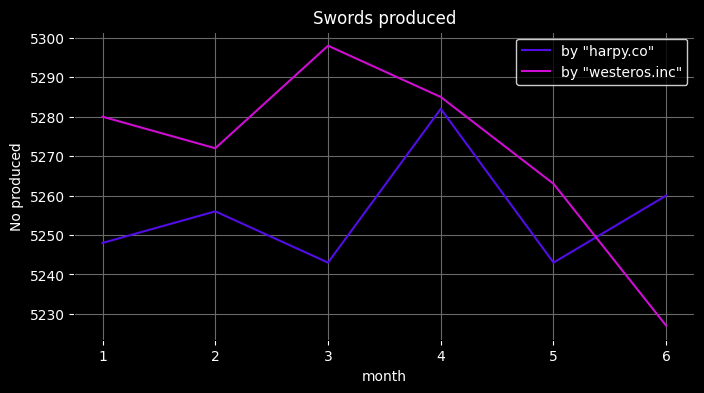

In [4]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(np.arange(1, 6+1), produced_sum['harpy.co'], label='by "harpy.co"', color='#520DE6')
ax.plot(np.arange(1, 6+1), produced_sum['westeros.inc'], label='by "westeros.inc"', color='#CE0DD3')
ax.grid(True, color='dimgrey')
ax.set_title('Swords produced')
ax.legend()
ax.set_xlabel('month')
ax.set_ylabel('No produced')
plt.savefig('3-before-last.png')
plt.show()

In [5]:
grouped = data.groupby(['supplier', 'report.date'])

In [6]:
defect_sum = grouped['defects'].sum()

In [7]:
defect_sum

supplier      report.date
harpy.co      1                 0.0
              2               126.0
              3               268.0
              4               402.0
              5              1180.0
              6              1777.0
              7              2327.0
westeros.inc  1                 0.0
              2               449.0
              3               852.0
              4              1290.0
              5              1573.0
              6              1915.0
              7              2189.0
Name: defects, dtype: float64

In [8]:
dataframe = pd.DataFrame(data=np.array([defect_sum['harpy.co'][1:], defect_sum['westeros.inc'][1:]])).transpose()
dataframe.index = np.arange(1, 6+1)
dataframe = dataframe.rename(columns={0: '"harpy.co"', 1: '"westeros.inc"'})

In [9]:
dataframe

,"""harpy.co""","""westeros.inc"""
1,126.0,449.0
2,268.0,852.0
3,402.0,1290.0
4,1180.0,1573.0
5,1777.0,1915.0
6,2327.0,2189.0


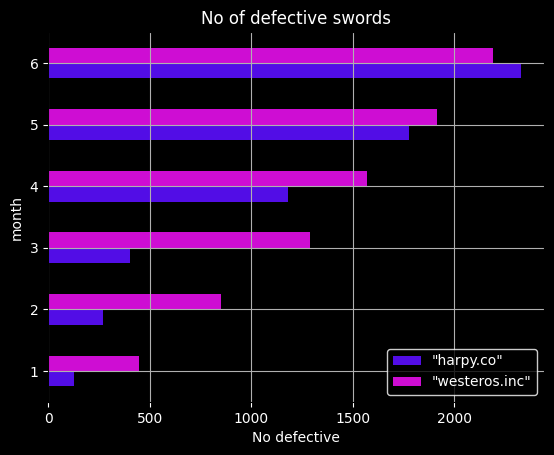

In [10]:
dataframe.plot(kind='barh', legend=True, ylabel='month', xlabel='No defective', grid=(True, 'dimgrey'), color=['#520DE6', '#CE0DD3'], title='No of defective swords')
plt.savefig('2-before-last.png')
plt.show()

In [11]:
grouped = data.groupby(['supplier', 'production.date'])
produced_sum = grouped['produced'].sum()
produced_sum

supplier      production.date
harpy.co      1                  5248.0
              2                  5256.0
              3                  5243.0
              4                  5282.0
              5                  5243.0
              6                  5260.0
westeros.inc  1                  5280.0
              2                  5272.0
              3                  5298.0
              4                  5285.0
              5                  5263.0
              6                  5227.0
Name: produced, dtype: float64

In [12]:
grouped = data.groupby(['supplier', 'report.date'])
defective_sum = grouped['defects'].sum()
defective_sum

supplier      report.date
harpy.co      1                 0.0
              2               126.0
              3               268.0
              4               402.0
              5              1180.0
              6              1777.0
              7              2327.0
westeros.inc  1                 0.0
              2               449.0
              3               852.0
              4              1290.0
              5              1573.0
              6              1915.0
              7              2189.0
Name: defects, dtype: float64

In [13]:
defective_part = pd.DataFrame(columns=['harpy.co', 'westeros.inc'])

In [14]:
defective_part['harpy.co'] = np.array(defective_sum['harpy.co'].iloc[1:]) / np.array(produced_sum['harpy.co'])
defective_part['westeros.inc'] = np.array(defective_sum['westeros.inc'].iloc[1:]) / np.array(produced_sum['westeros.inc'])

In [15]:
defective_part.index = np.arange(1, 6+1)

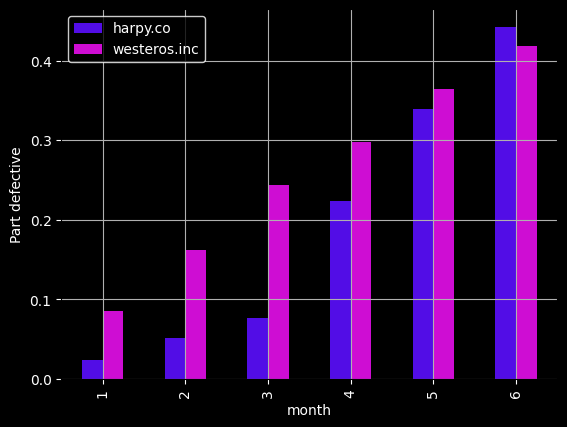

In [16]:
defective_part.plot(kind='bar', legend=True, xlabel='month', ylabel='Part defective',
                    grid=(True, 'dimgrey'), color=['#520DE6', '#CE0DD3'])
plt.xticks(rotation=90)
plt.savefig('prelast.png')
plt.show()

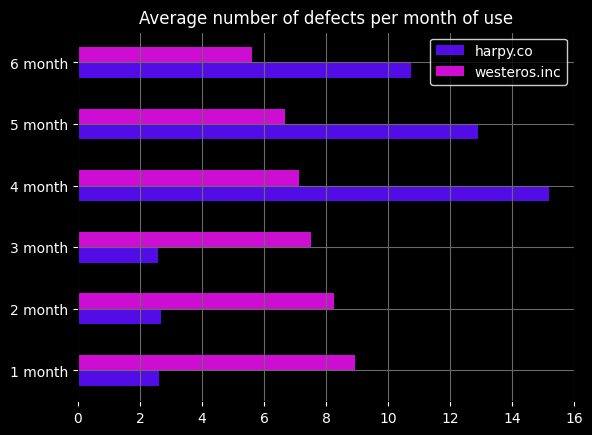

In [17]:
pdata = pd.read_csv('production-data.csv', delimiter=',')
pdata['new'] = pdata['report.date'] - pdata['production.date']
gb = pdata.groupby(['supplier', 'new'])['defects']
gb = gb.mean()
harp_co = np.array(gb['harpy.co'][1:])
west_inc = np.array(gb['westeros.inc'][1:])

d = (np.array([harp_co, west_inc])).transpose()
df = pd.DataFrame(data=d)
rvals = ['1 month', '2 month', '3 month', '4 month', '5 month', '6 month']
df.columns = ['harpy.co', 'westeros.inc']
ax = df.plot(kind='barh', stacked=False, color=['#520DE6', '#CE0DD3'])
ax.set_yticklabels(rvals)
ax.set_xlim([0, 16])
ax.set_title('Average number of defects per month of use')
ax.grid(True, color='dimgrey')
plt.savefig('last.png')
plt.show()